In [2]:
import os
import pypianoroll
from xml_to_mid import xml_to_mid

folder = '/home/azuma/workspace/git/lead-sheet-dataset/datasets/xml/a'

def proc_midi_to_pianoroll(filename, beats_in_measure):
    piano_roll = pypianoroll.parse(filename)
    piano_roll.downbeat[0::piano_roll.beat_resolution * beats_in_measure] = True
    return piano_roll

from pathlib import Path
from random import seed, shuffle
def get_p_extension_list(folder, extension='xml', seed_int=666):
    p_folder = Path(folder)
    p_extension_list = list(p_folder.glob('**/*.' + extension))
    
    seed(seed_int)
    shuffle(p_extension_list)
    
    return p_extension_list


p_xml_list = get_p_extension_list(folder, 'xml')
samples = p_xml_list[:3]
print(samples)

[PosixPath('/home/azuma/workspace/git/lead-sheet-dataset/datasets/xml/a/a-love-like-pi/heavens-halberd/verse.xml'), PosixPath('/home/azuma/workspace/git/lead-sheet-dataset/datasets/xml/a/aesop-rock/daylight/instrumental.xml'), PosixPath('/home/azuma/workspace/git/lead-sheet-dataset/datasets/xml/a/astor-piazzolla/libertango/chorus.xml')]


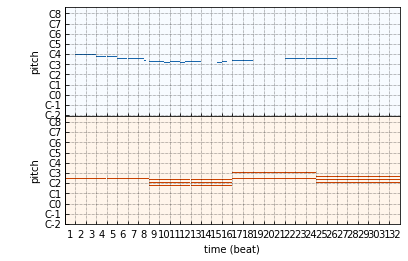

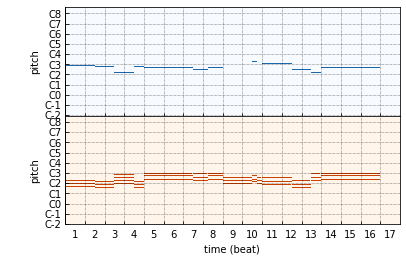

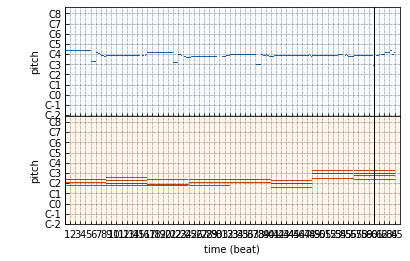

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

save_path = './dataset'
p_dataset = Path(save_path)

xml_to_mid(samples, save_path)

for i in range(3):
    pianoroll = proc_midi_to_pianoroll(os.path.join(save_path, str(i) + '.mid'), 60)
    pianoroll.plot()
    plt.show()
    
plt.close()

In [23]:
import pretty_midi
import pickle

p_midi_list = get_p_extension_list(save_path, 'mid')
p_chord_list = get_p_extension_list(save_path, 'chord')
print(p_midi_list)
print(p_chord_list)

fs = 10
batch_song = 3

[PosixPath('dataset/2.mid'), PosixPath('dataset/1.mid'), PosixPath('dataset/0.mid')]
[PosixPath('dataset/0.chord'), PosixPath('dataset/2.chord'), PosixPath('dataset/1.chord')]


In [32]:
def generate_pianoroll_dict(p_midi_list, batch_song = 16, start_index=0, fs=30):
    assert len(p_midi_list) >= batch_song
    
    pianoroll_dict = {} # key: file_num, value: pianoroll
    process_midi = range(start_index,  min(start_index + batch_song, len(p_midi_list)) )
    
    for p_midi in p_midi_list:
        name_num = int(p_midi.name.split('.')[0])
        try: # Handle exception on malformat MIDI files
            midi_pretty_format = pretty_midi.PrettyMIDI(str(p_midi))
            piano_midi = midi_pretty_format.instruments[0] # Get the piano channels
            piano_roll = piano_midi.get_piano_roll(fs=fs)
            pianoroll_dict[name_num] = piano_roll
        except Exception as e:
            print(e)
            print("broken file : {}".format(p_midi))
            pass
    return pianoroll_dict


def generate_notes_chord_dict(p_chord_list, fs=30):
     
    notes_chord_dict = {} # key: file_num, value: notes_chord
    for p_chord in p_chord_list:
        name_num = int(p_chord.name.split('.')[0])
        with open(str(p_chord), "rb") as f:
            chord_symbols = pickle.load(f) # (chord, start, end)
        
        chord_list = []
        for chord_info in chord_symbols:
            # get upper code of oncode
            # Todo: use regular expression
            if '|' in chord_info[0]:
                chord = chord_info[0].split('|')[0]
            elif ' ' in chord_info[0]:
                chord = chord_info[0].split(' ')[0]
            else:
                chord = chord_info[0]
            chord_list.append(chord)

        counter = 0
        notes_chord = []
        for i in range(len(chord_symbols)):
            while True:
                notes_chord.append(chord_list[i])
                counter += 1
                if counter >= int(chord_symbols[i][2] * fs):
                    break
        notes_chord_dict[name_num] = notes_chord

    return notes_chord_dict


def reshape_dicts(pianoroll_dict, notes_chord_dict):
    
    for i in range(len(pianoroll_dict.keys())):
        pianoroll_dict_len = pianoroll_dict[i].shape[1]  
        notes_chord_dict_len = len(notes_chord_dict[i]) 
        
        if pianoroll_dict_len >= notes_chord_dict_len:
            pianoroll_dict[i] = pianoroll_dict[i][:notes_chord_dict_len]
        else:
            notes_chord_dict[i] = notes_chord_dict[i][:pianoroll_dict_len]
        
    return pianoroll_dict, notes_chord_dict


['dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'dm', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'am', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
(128, 123)
123


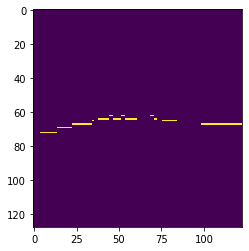

['abm', 'abm', 'abm', 'abm', 'abm', 'abm', 'abm', 'abm', 'abm', 'Gb', 'Gb', 'Gb', 'Gb', 'Gb', 'Gb', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Gb', 'Gb', 'Gb', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'B ', 'B ', 'B ', 'B ', 'B ', 'E', 'E', 'E', 'E', 'E', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'dbm', 'dbm', 'B', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'ebm ', 'ebm ', 'ebm ', 'ebm ', 'ebm ', 'ebm ', 'B ', 'B ', 'B ', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
(102, 102)
102


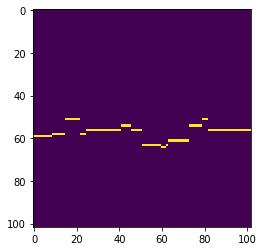

['abm', 'abm', 'abm', 'abm', 'abm', 'abm', 'abm', 'abm', 'abm', 'Gb', 'Gb', 'Gb', 'Gb', 'Gb', 'Gb', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Bmaj7', 'Gb', 'Gb', 'Gb', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'B ', 'B ', 'B ', 'B ', 'B ', 'E', 'E', 'E', 'E', 'E', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'dbm', 'dbm', 'B', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'Gb ', 'ebm ', 'ebm ', 'ebm ', 'ebm ', 'ebm ', 'ebm ', 'B ', 'B ', 'B ', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
(128, 250)
250


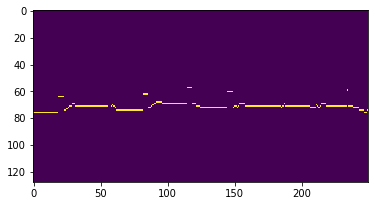

In [35]:
pianoroll_dict = generate_pianoroll_dict(p_midi_list, batch_song=batch_song, fs=fs)
notes_chord_dict = generate_notes_chord_dict(p_chord_list,fs=fs)
pianoroll_dict, notes_chord_dict = reshape_dicts(pianoroll_dict, notes_chord_dict)

plt.imshow(pianoroll_dict[0])
print(notes_chord_dict[0])
print(pianoroll_dict[0].shape)
print(len(notes_chord_dict[0]))
plt.show()

plt.imshow(pianoroll_dict[1])
print(notes_chord_dict[1])
print(pianoroll_dict[1].shape)
print(len(notes_chord_dict[1]))
plt.show()

plt.imshow(pianoroll_dict[2])
print(notes_chord_dict[1])
print(pianoroll_dict[2].shape)
print(len(notes_chord_dict[2]))
plt.show()